In [21]:
#  importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#  importing the dataset 

dataset = pd.read_csv("./Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values  # the first column isn't included in the matrix of features, because it is alreay encoded using the "level" feature and hence there is no need to do one hot encoding.
y = dataset.iloc[:, -1].values    # dependent variable vector
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [23]:
#  training the linear regression model on the whole dataset
#  we didnt split into training and test set since we want to leverage our model 
#  this is a simple linear regression since it involves 2 variables; dependent and independent features

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression()

In [24]:
# training the polynomial regression model on the whole dataset
#  we didnt split into training and test set since we want to leverage our model 

from sklearn.preprocessing import PolynomialFeatures
polynomial_reg = PolynomialFeatures(degree = 4)
X_polynomial = polynomial_reg.fit_transform(X)
linear_regressor_two = LinearRegression()
linear_regressor_two.fit(X_polynomial, y)

LinearRegression()

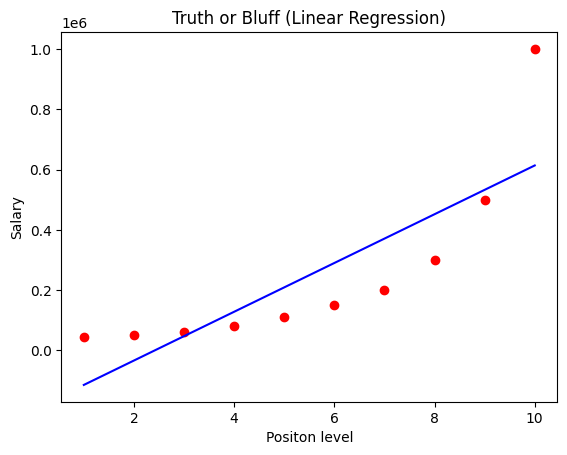

In [25]:
#  visualizing the linear regression results

plt.scatter(X, y, color='red')
plt.plot(X, linear_regressor.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Positon level')
plt.ylabel('Salary')
plt.show()

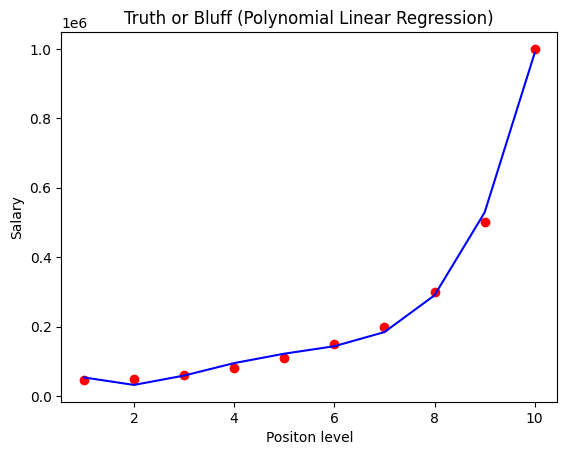

In [26]:
#  visualizing the polynomial linear regression result

plt.scatter(X, y, color='red')
plt.plot(X, linear_regressor_two.predict(X_polynomial), color='blue')
plt.title('Truth or Bluff (Polynomial Linear Regression)')
plt.xlabel('Positon level')
plt.ylabel('Salary')
plt.show()

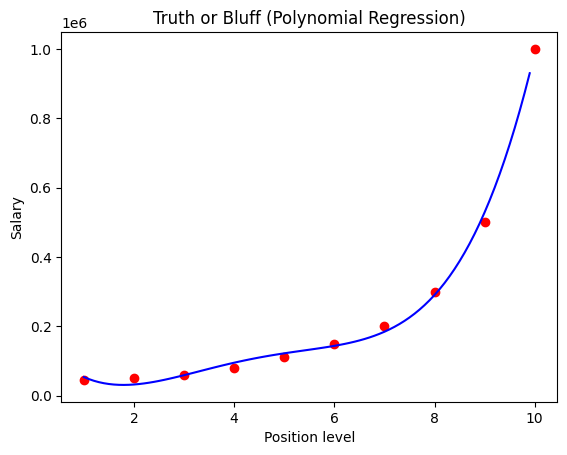

In [28]:
#  visualizing the polynomial test results( for higher resolution and smoother curve ) by making the graph dense as a result of creating more disturbance using 0.1

X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, linear_regressor_two.predict(polynomial_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [29]:
#  predicting the salary with linear regression

linear_regressor.predict([[6.5]])

array([330378.78787879])

In [31]:
#  predicting the salary with polynomial linear regression

linear_regressor_two.predict(polynomial_reg.fit_transform([[6.5]]))

array([158862.45265155])